In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Correlação linear.

A correlação linear tem o objetivo de mostrar como duas variáveis estão associadas entre si. Vamos estudar ela, porque sem ela podemos acabar tentando prever algo que não possui relação nenhuma e achar que o problema é modelo que criamos, sendo que é porque nossos dados desde o começo não possuiam correlação. Para evitar que algo do tipo aconteça, vamos estudar, entender e criar nossa própria função de correlação.

## 1. Correlação de Pearson

Para medir o grau de correlação entre variáveis, usamos o coeficiente de correlação de Pearson. Que é uma fórmula aplicada sobre suas variáveis, que retorna o grau de correlação entre elas.
O grau de correlação pode variar entre -1 e 1. Onde -1 indica que há uma correlação perfeita negativamente, -0.5 que há uma correlação fraca negativamente, 0 não há correlação, 0.5 há uma correlação fraca positivamente e 1 que há uma correção perfeita e postiva, assim como é mostrado a seguir.

![](img/grau.png)

### 1.1. A equação

![](img/corr.png)

![](img/corr.jpg)

**xi** = valor de x na linha i <br>
**xbarra** = média dos valores de x <br>
**yi** = valor de y na linha i <br>
**ybarra** = média dos valores de y <br>

## 2. Correlação de pearson na prática

Agora vamos praticar um pouquinho. Dado o seguinte dataframe, vamos calcular a correlação entre as variáveis.

In [2]:
casas = pd.DataFrame([[426.72, 245000],
                     [487.68,  312000],
                     [518.16,  279000], 
                     [571.5,   308000], 
                     [335.28,  199000], 
                     [472.44,  219000],
                     [716.28,  405000],
                     [746.76,  324000],
                     [434.34,  319000],
                     [518.16,  255000]], columns=['Tamanho da casa em metros', 'Preço em dolar'])

In [3]:
casas

,Tamanho da casa em metros,Preço em dolar
0,426.72,245000
1,487.68,312000
2,518.16,279000
3,571.50,308000
4,335.28,199000
5,472.44,219000
6,716.28,405000
7,746.76,324000
8,434.34,319000
9,518.16,255000


Vamos fazer por passos. Para cada valor de x, vamos calcular (xi - xbarra)

![](img/corr-p1.png)

Agora vamos criar uma função, que recebe um vetor e sua média. E coloca o valor de xi - xbarra em um vetor, para cada xi.

In [4]:
def calcSub(v):
    media = v.mean()
    vetor = []
    for i in v:
        vetor += [i - media]
    
    return vetor
    

In [5]:
calcSub(casas['Tamanho da casa em metros'])

[-96.01200000000006,
 -35.05200000000008,
 -4.572000000000116,
 48.767999999999915,
 -187.4520000000001,
 -50.29200000000009,
 193.5479999999999,
 224.0279999999999,
 -88.39200000000011,
 -4.572000000000116]

Agora, vamos adicionar esse vetor ao nosso dataframe.

In [6]:
casas['xi - xbarra'] = calcSub(casas['Tamanho da casa em metros'])

In [7]:
casas

,Tamanho da casa em metros,Preço em dolar,xi - xbarra
0,426.72,245000,-96.012
1,487.68,312000,-35.052
2,518.16,279000,-4.572
3,571.50,308000,48.768
4,335.28,199000,-187.452
5,472.44,219000,-50.292
6,716.28,405000,193.548
7,746.76,324000,224.028
8,434.34,319000,-88.392
9,518.16,255000,-4.572


Agora vamos fazer o mesmo processo para y.
![](img/corr-p2.png)

In [8]:
casas['yi - ybarra'] = calcSub(casas['Preço em dolar'])
casas

,Tamanho da casa em metros,Preço em dolar,xi - xbarra,yi - ybarra
0,426.72,245000,-96.012,-41500.0
1,487.68,312000,-35.052,25500.0
2,518.16,279000,-4.572,-7500.0
3,571.50,308000,48.768,21500.0
4,335.28,199000,-187.452,-87500.0
5,472.44,219000,-50.292,-67500.0
6,716.28,405000,193.548,118500.0
7,746.76,324000,224.028,37500.0
8,434.34,319000,-88.392,32500.0
9,518.16,255000,-4.572,-31500.0


Estamos terminando de calcular o numerador da fórmula, calminha!
![](img/corr-p3.png)

Vamos criar uma função que faça essa multiplicação por nós e já retorne o vetor desses valores.

In [9]:
arr = np.arange(0, len(casas['yi - ybarra']))
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
def calcMult(v1, v2):
    v = []
    for i in arr:
        v += [v1[i]*v2[i]]
    return v

In [11]:
calcMult(casas['xi - xbarra'], casas['yi - ybarra'])

[3984498.0000000023,
 -893826.000000002,
 34290.00000000087,
 1048511.9999999981,
 16402050.00000001,
 3394710.000000006,
 22935437.999999985,
 8401049.999999996,
 -2872740.0000000037,
 144018.00000000367]

In [12]:
casas['(xi - xbarra)*(yi - ybarra)'] = calcMult(casas['xi - xbarra'], casas['yi - ybarra'])
casas

,Tamanho da casa em metros,Preço em dolar,xi - xbarra,yi - ybarra,(xi - xbarra)*(yi - ybarra)
0,426.72,245000,-96.012,-41500.0,3984498.0
1,487.68,312000,-35.052,25500.0,-893826.0
2,518.16,279000,-4.572,-7500.0,34290.0
3,571.50,308000,48.768,21500.0,1048512.0
4,335.28,199000,-187.452,-87500.0,16402050.0
5,472.44,219000,-50.292,-67500.0,3394710.0
6,716.28,405000,193.548,118500.0,22935438.0
7,746.76,324000,224.028,37500.0,8401050.0
8,434.34,319000,-88.392,32500.0,-2872740.0
9,518.16,255000,-4.572,-31500.0,144018.0


Agora, vamos fazer a função de somatório sobre casas[\'(xi - xbarra)\*(yi - ybarra)\'] para obter, a seguinte parte da equação:
![](img/corr-p4.png)

In [13]:
def somatorio(v):
    soma = 0
    q = np.arange(0, len(v))
    for i in q:
        soma += v[i]
    return soma

A nível de simplicidade, vamos fazer uma calcSub2 para calcular (xi - xbarra)^2 e (yi - ybarra)^2

In [14]:
def calcSub2(v):
    media = v.mean()
    vetor = []
    for i in v:
        vetor += [pow(i - media, 2)]
    
    return vetor

Agora, já podemos criar nossa função completa de correlação

In [15]:
#calcSub -> faz a subtracao de um valor x - a média da sua lista.
#calcMult -> Recebe dois vetores e em cada posição, retorna a multiplicação entre v1[i] e v2[i].
#somatoria -> realiza a soma todos os elementos de uma lista.
def correlacao(v1, v2):
    numerador = somatorio(calcMult(calcSub(v1), (calcSub(v2))))
    denominador1 = somatorio(calcSub2(v1))
    denominador2 = somatorio(calcSub2(v2))
    raiz = math.sqrt(denominador1 * denominador2)
    
    return (numerador/raiz)


In [16]:
correlacao(casas['Tamanho da casa em metros'], casas['Preço em dolar'])

0.7621137132162579

Agora que entendemos como funciona a correlação e como podemos criar sua função. Vamos as bibliotecas que disponibilizam a função de correlação.

## 3. Funções prontas de correlação e visualização

In [17]:
matriz_corr = casas.iloc[:,:2].corr(method='pearson')

In [18]:
matriz_corr

,Tamanho da casa em metros,Preço em dolar
Tamanho da casa em metros,1.000000,0.762114
Preço em dolar,0.762114,1.000000


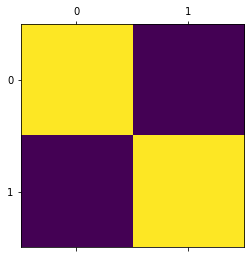

In [19]:
plt.matshow(matriz_corr)
plt.show()

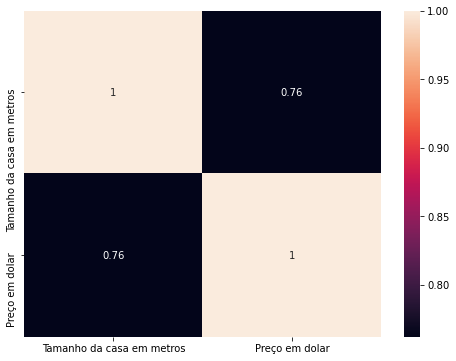

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True)
plt.show()

In [21]:
matriz_corr.style.background_gradient(cmap='coolwarm')

,Tamanho da casa em metros,Preço em dolar
Tamanho da casa em metros,1.000000,0.762114
Preço em dolar,0.762114,1.000000


## 6. Referências
[Cálculo do Coeficiente de Correlação Linear pela Fórmula - Correlação e Regressão](https://www.youtube.com/watch?v=Pmmjb78j_Rg&t=236s)<br>
[COEFICIENTE DE CORRELAÇÃO LINEAR](https://www.youtube.com/watch?v=ayAxTRN4aVg&t=106s)<br>
[Problema de prever preço de casas usando o algoritmo de Regressão Linear](https://github.com/ciencia-de-dados-pratica/praticas/blob/master/Regress%C3%A3o%20Pre%C3%A7o%20de%20Casas.ipynb)<br>
[Matriz de Correlação Pandas](https://www.delftstack.com/pt/howto/python-pandas/pandas-correlation-matrix/#visualizar-a-matriz-de-correla%25C3%25A7%25C3%25A3o-pandas-utilizando-o-m%25C3%25A9todo-matplotlib.pyplot.matshow)

#### Para acessar o material em vídeo no Youtube:
[Correlação linear](https://youtu.be/ALZr-_5AUpQ)